# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

In [42]:
# ! python -m spacy download en_core_web_sm

In [43]:
import spacy

nlp = spacy.load('en_core_web_sm')

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [48]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [50]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [51]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

In [52]:
# Split data into numerical, categorical, and text features

In [53]:
# Numerical: num_features
# Categorical: cat_features
# Text: text_features

In [54]:
num_features = (
    X
    .select_dtypes(exclude=['object']).columns
    .drop(
        [
            # 'Title'
        ],
    )
)
print('Numerical features:', num_features)

cat_features = (
    X[[
        'Title',
        'Division Name',
        'Department Name',
        'Class Name',
    ]].columns
)
print('Categorical features:', cat_features)


text_features = (
    X[[
        'Review Text',
    ]].columns
)
print ('Review Text features:', text_features)

Numerical features: Index(['Clothing ID', 'Age', 'Positive Feedback Count'], dtype='object')
Categorical features: Index(['Title', 'Division Name', 'Department Name', 'Class Name'], dtype='object')
Review Text features: Index(['Review Text'], dtype='object')


In [55]:
# Define pipeline for numerical features

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    (
        'imputer',
        SimpleImputer(strategy='mean'),
    ),
    (
        'scaler',
        MinMaxScaler(),
    ),
])

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler())])

In [57]:
# Define pipeline for categorical features

In [58]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    (
        'ordinal_encoder',
        OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,
        )
    ),    
    (
        'imputer',
        SimpleImputer(
            strategy='most_frequent',
        )
    ),
    (
        'cat_encoder',
        OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
        )
    ),
])

cat_pipeline

Pipeline(steps=[('ordinal_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [59]:
# Text Feature Pipeline

In [60]:
    # We are going to utilize spaCy and built-in Python functions to process the text in custom Scikit-learn Transformers

In [61]:
# Will create a CountCharacter() Scikit-learn Transformer using BaseEstimator and TransformerMixin

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin
# Takes in a string for the character to count
# Outputs the number times that character appears in the text

from scipy.sparse import csr_matrix
class CountCharacter(BaseEstimator, TransformerMixin):
    def __init__(self, character):
        self.character = character

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Returnăm sparse matrix în loc de dense
        counts = np.array([x.count(self.character) for x in X]).reshape(-1, 1)
        return csr_matrix(counts)

In [63]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
import numpy as np

initial_text_preprocess = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ),
])

In [64]:
feature_engineering = FeatureUnion([
    ('count_spaces', CountCharacter(character=' ')),
    ('count_exclamations', CountCharacter(character='!')),
    ('count_question_marks', CountCharacter(character='?')),
])

character_counts_pipeline = Pipeline([
    (
        'initial_text_preprocess',
        initial_text_preprocess,
    ),
    (
        'feature_engineering',
        feature_engineering,
    ),
])
character_counts_pipeline

Pipeline(steps=[('initial_text_preprocess',
                 Pipeline(steps=[('dimension_reshaper',
                                  FunctionTransformer(func=<function reshape at 0x0000026D63138230>,
                                                      kw_args={'newshape': -1}))])),
                ('feature_engineering',
                 FeatureUnion(transformer_list=[('count_spaces',
                                                 CountCharacter(character=' ')),
                                                ('count_exclamations',
                                                 CountCharacter(character='!')),
                                                ('count_question_marks',
                                                 CountCharacter(character='?'))]))])

In [65]:
# Create an SpacyLemmatizer
class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lemmatized = [
            ' '.join(
                token.lemma_ for token in doc
                if not token.is_stop
            )
            for doc in self.nlp.pipe(X)
        ]
        return lemmatized   

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_pipeline = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ),
    (
        'lemmatizer',
        SpacyLemmatizer(nlp=nlp),
    ),
    (
        'tfidf_vectorizer',
        TfidfVectorizer(
            stop_words='english',
        ),
    ),
])
tfidf_pipeline 

Pipeline(steps=[('dimension_reshaper',
                 FunctionTransformer(func=<function reshape at 0x0000026D63138230>,
                                     kw_args={'newshape': -1})),
                ('lemmatizer',
                 SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x0000026D6F5E4580>)),
                ('tfidf_vectorizer', TfidfVectorizer(stop_words='english'))])

In [67]:
# Combine Feature Engineering Pipelines

In [68]:
from sklearn.compose import ColumnTransformer

feature_engineering = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('character_counts', character_counts_pipeline, text_features),
        ('tfidf_text', tfidf_pipeline, text_features),
])

feature_engineering

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['Clothing ID', 'Age', 'Positive Feedback Count'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_en...
                                 Index(['Review Text'], dtype='object')),
                                ('tfidf_text',
                                 Pipeline(steps=[('dimension_reshaper',
                                                  FunctionTransformer(func=<function reshape at 0x0000026D63138230>,
                                                                      kw_args={'newshape': -1})),
                                                 ('lemmatizer',
                                                  SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x0000026D6F5E4580>)),
                                                 ('tfidf_vectorizer',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 Index(['Review Text'], dtype='object'))])

In [69]:
# Train & Evaluate Model

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

model_pipeline = make_pipeline(
    feature_engineering,
    RandomForestClassifier(random_state=27),
)

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Clothing ID', 'Age', 'Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('imputer',
                                                                   SimpleImpute...
                                                  Pipeline(steps=[('dimension_reshaper',
                                                                   FunctionTransformer(func=<function reshape at 0x0000026D63138230>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x0000026D6F5E4580>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  Index(['Review Text'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=27))])

In [71]:
# Evaluate Model

In [72]:
from sklearn.metrics import accuracy_score
model_pipeline.fit(X_train, y_train)
# verificare dacă e fitted corect

from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError

try:
    check_is_fitted(model_pipeline)
except NotFittedError:
    assert False, "Modelul nu este antrenat (not fitted)!"
    
y_pred_forest_pipeline = model_pipeline.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8428184281842819


In [73]:
# Plot the confusion matrix

C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


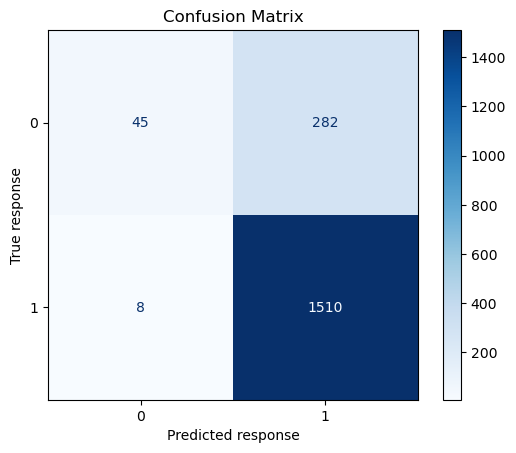

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Exemplu: y_true și y_pred
y_pred = model_pipeline.predict(X_test)
y_true = y_test

# Calculează matricea de confuzie
cm = confusion_matrix(y_true, y_pred)

# Afișează matricea de confuzie
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

plt.xlabel('Predicted response')
plt.ylabel('True response')
plt.title('Confusion Matrix')
plt.show()


In [75]:
# Fine-Tune Model

In [76]:
from sklearn.model_selection import RandomizedSearchCV

# Set parameters to randomly search over
# A couple parameters with 2-5 options each is very good.
my_distributions = dict(
    randomforestclassifier__max_features=[
        100,
        150,
        250,
    ],
    randomforestclassifier__n_estimators=[
        150,
        200,
    ],
)

param_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=my_distributions,
    n_iter=4,     # Try 4 different combinations of parameters
    cv=3,         # Use 3-fold cross-validation
    n_jobs= 1,    # Setting n_jobs=1 avoids parallelism, which reduces memory load. This will be slower but more memory-efficient (no multiprocessing -1)
    refit=True,   # Refit the model using the best parameters found
    verbose=3,    # Output of parameters, score, time
    random_state=27,
)

param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 1/3] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=200;, score=0.836 total time=372.1min


C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 2/3] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=200;, score=0.837 total time=11.7min


C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 3/3] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=200;, score=0.835 total time=11.4min


C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 1/3] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=150;, score=0.841 total time=219.5min


C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 2/3] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=150;, score=0.843 total time=11.8min


C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 3/3] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=150;, score=0.838 total time=11.1min


C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 1/3] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=200;, score=0.855 total time=296.2min


C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 2/3] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=200;, score=0.851 total time=15.7min


C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 3/3] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=200;, score=0.846 total time=17.0min


C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 1/3] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=150;, score=0.856 total time=13.6min


C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 2/3] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=150;, score=0.853 total time=14.4min


C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[CV 3/3] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=150;, score=0.848 total time=13.3min


{'randomforestclassifier__n_estimators': 150,
 'randomforestclassifier__max_features': 250}

In [77]:
model_best = param_search.best_estimator_
model_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Clothing ID', 'Age', 'Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('imputer',
                                                                   SimpleImpute...
                                                                   FunctionTransformer(func=<function reshape at 0x0000026D63138230>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x0000026D784675E0>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  Index(['Review Text'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=250, n_estimators=150,
                                        random_state=27))])

In [78]:
y_pred_forest_pipeline = model_best.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8482384823848238


## Data Exploration

## Building Pipeline

## Training Pipeline

## Fine-Tuning Pipeline